In [22]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import datetime
import json
import io

In [23]:
limit = 100000
link = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit={}".format(limit)


In [24]:

#with open('data.json') as json_data:
    #data_dict = json.load(json_data) 
    #print(data_dict)#pour le dictionnaire

In [25]:
data = pd.read_csv("C:/Users/numuhire/Desktop/Formation Simplon/Python/projet/bike/bike_data.csv", sep = ";")
#sep pour change les separateurs

In [26]:
data.head(5)

,dag,tijdstip,noord,zuid,actief
0,12.10.12,23:12:21,7,10,NaN
1,12.10.12,23:27:21,16,18,NaN
2,12.10.12,23:42:21,7,17,NaN
3,12.10.12,23:57:21,1,12,NaN
4,13.10.12,0:12:21,6,5,NaN


In [27]:
type(data)# dat type

pandas.core.frame.DataFrame

In [28]:
data.info()# information sur data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
dag         500 non-null object
tijdstip    500 non-null object
noord       500 non-null int64
zuid        500 non-null int64
actief      0 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 19.7+ KB


In [29]:
data["dag_tijdstip"]=(data['dag'] + " " + data['tijdstip']) # new Columns combine the 'dag' and 'tijdstip' 
data.columns

Index(['dag', 'tijdstip', 'noord', 'zuid', 'actief', 'dag_tijdstip'], dtype='object')

In [30]:
data['dag_tijdstip'] = pd.to_datetime(data['dag'] + " " + data['tijdstip'],dayfirst=True) #conversion en datetime values

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
dag             500 non-null object
tijdstip        500 non-null object
noord           500 non-null int64
zuid            500 non-null int64
actief          0 non-null float64
dag_tijdstip    500 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 23.6+ KB


In [32]:
bike = data.set_index("dag_tijdstip") #Set the resulting dates as the index

In [33]:
bike.drop(['dag', 'tijdstip'], axis='columns', inplace=True) # Remove the original 'dag' and 'tijdstip' columns

In [34]:
bike.rename(columns={'noord': 'north', 'zuid': 'south'}, inplace=True)# Rename columns

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2012-10-12 23:12:21 to 2012-10-18 03:57:21
Data columns (total 3 columns):
north     500 non-null int64
south     500 non-null int64
actief    0 non-null float64
dtypes: float64(1), int64(2)
memory usage: 15.6 KB


In [36]:
bike.head(5)

,north,south,actief
dag_tijdstip,,,
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


<IPython.core.display.Javascript object>


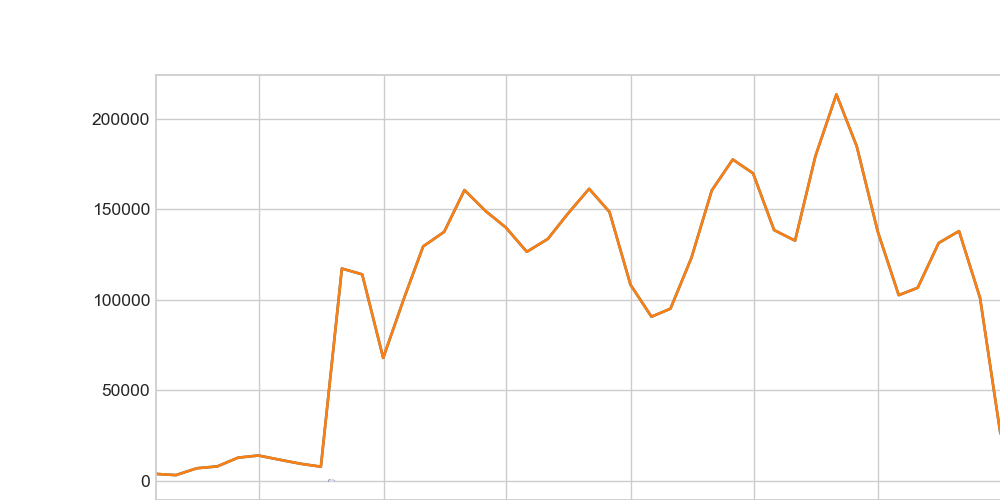

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
bike.plot(colormap='coolwarm', ax=ax)

In [38]:
#%timeit pd.to_datetime(combined, dayfirst=True)

In [39]:
#%timeit pd.to_datetime(combined, format="%d.%m.%y %H:%M:%S")

In [40]:
link1 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv?limit=100000"
link2 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201312tot201505.csv?limit=100000"

In [42]:
def process_bike_count_data(df):
    df['date'] = pd.to_datetime(df[['dag', 'tijdstip']].apply(lambda x: ' '.join(x), axis=1))
    df = df.set_index("date")
    df = df.drop(columns = ["dag", "tijdstip"])
    df = df.rename(columns = {"noord" : "north", "zuid" : "south", "actief" : "active"})
    return df

In [43]:
df1 = pd.read_csv(link1, sep=';')
df1 = process_bike_count_data(df1)

In [44]:
df2 = pd.read_csv(link2, sep=';')
df2 = process_bike_count_data(df2)

In [45]:
df1.head(5)

,north,south,active
date,,,
2012-12-10 23:12:21,7,10,NaN
2012-12-10 23:27:21,16,18,NaN
2012-12-10 23:42:21,7,17,NaN
2012-12-10 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


In [46]:
df2

,north,south,active
date,,,
2013-12-22 15:17:08,10,10,NaN
2013-12-22 15:32:08,7,15,NaN
2013-12-22 15:47:08,14,15,NaN
2013-12-22 16:02:08,8,12,NaN
2013-12-22 16:17:08,17,6,NaN
...,...,...,...
2015-05-27 10:25:02,42,25,NaN
2015-05-27 10:40:02,47,35,NaN
2015-05-27 10:55:02,33,25,NaN


In [47]:
df2_sub=df2['2014-03-17 17:05:10':]
df2_sub

,north,south,active
date,,,
2014-04-01 00:02:08,1,3,NaN
2014-04-01 00:17:08,3,11,NaN
2014-04-01 00:32:08,0,3,NaN
2014-04-01 00:47:08,1,8,NaN
2014-04-01 01:02:08,1,7,NaN
...,...,...,...
2015-05-27 10:25:02,42,25,NaN
2015-05-27 10:40:02,47,35,NaN
2015-05-27 10:55:02,33,25,NaN


In [48]:
bigdata = pd.concat([df1,df2_sub], ignore_index=False, sort =False)

In [49]:
bigdata

,north,south,active
date,,,
2012-12-10 23:12:21,7,10,NaN
2012-12-10 23:27:21,16,18,NaN
2012-12-10 23:42:21,7,17,NaN
2012-12-10 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN
...,...,...,...
2015-05-27 10:25:02,42,25,NaN
2015-05-27 10:40:02,47,35,NaN
2015-05-27 10:55:02,33,25,NaN


In [50]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91832 entries, 2012-12-10 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91832 non-null int64
south     91832 non-null int64
active    27 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


In [51]:
df1.drop_duplicates()

,north,south,active
date,,,
2012-12-10 23:12:21,7,10,NaN
2012-12-10 23:27:21,16,18,NaN
2012-12-10 23:42:21,7,17,NaN
2012-12-10 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN
...,...,...,...
2014-03-17 09:05:09,170,53,NaN
2014-03-17 09:20:09,132,37,NaN
2014-03-17 09:35:09,125,52,NaN


In [52]:
df2.drop_duplicates()

,north,south,active
date,,,
2013-12-22 15:17:08,10,10,NaN
2013-12-22 15:32:08,7,15,NaN
2013-12-22 15:47:08,14,15,NaN
2013-12-22 16:02:08,8,12,NaN
2013-12-22 16:17:08,17,6,NaN
...,...,...,...
2015-05-27 08:55:02,238,36,NaN
2015-05-27 09:10:02,228,54,NaN
2015-05-27 09:25:02,173,76,NaN


In [53]:
df3=pd.concat([df1,df2_sub], ignore_index=False, sort =False)

In [54]:
len(df3)

91832

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91832 entries, 2012-12-10 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91832 non-null int64
south     91832 non-null int64
active    27 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


In [56]:
df3.equals(data)

False

In [57]:
df3.to_csv("bike_count_interim.csv")# saving this result as csv a interim data output

In [58]:
df = pd.read_csv("bike_count_interim.csv", index_col=0, parse_dates=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91832 entries, 2012-12-10 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91832 non-null int64
south     91832 non-null int64
active    27 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


In [60]:
df3

,north,south,active
date,,,
2012-12-10 23:12:21,7,10,NaN
2012-12-10 23:27:21,16,18,NaN
2012-12-10 23:42:21,7,17,NaN
2012-12-10 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN
...,...,...,...
2015-05-27 10:25:02,42,25,NaN
2015-05-27 10:40:02,47,35,NaN
2015-05-27 10:55:02,33,25,NaN


In [63]:
mis_val = df3["active"].isnull().sum()# compter les missing values

In [64]:
mis_val

91805

In [65]:
supp_NaN = df3.dropna() # supprimer les NaN dans la colonne Active
supp_NaN

,north,south,active
date,,,
2012-10-30 23:22:00,178,215,OFF
2012-12-18 05:32:20,2,1,OFF
2013-04-02 11:43:20,22,15,OFF
2013-03-24 18:24:30,7,9,OFF
2013-12-05 02:07:20,2,3,OFF
2013-06-29 08:46:00,10,2,OFF
2013-08-16 15:34:20,43,29,OFF
2013-03-10 22:08:30,35,44,OFF
2013-05-10 18:38:10,30,32,OFF


In [66]:
len(supp_NaN)

27

In [67]:
#What is the average number of bikers passing each 15 min?

In [69]:
#pd.to_timedelta(int((df3.hour*3600+df3.minute*60+fd3.second).mean()),unit='s')

In [70]:
df3.resample('H').mean()

,north,south
date,,
2012-01-11 00:00:00,10.00,14.75
2012-01-11 01:00:00,5.00,12.50
2012-01-11 02:00:00,6.25,11.00
2012-01-11 03:00:00,5.00,14.00
2012-01-11 04:00:00,3.50,12.25
...,...,...
2015-12-05 19:00:00,57.25,115.50
2015-12-05 20:00:00,48.50,61.75
2015-12-05 21:00:00,29.75,40.00


In [72]:
df3.sort_values(by = ['north','south'], ascending = False).head(10) 
#What are the 10 highest peak values observed during any of the intervals?

,north,south,active
date,,,
2013-10-16 21:38:28,361,43,NaN
2014-09-23 08:57:42,333,124,NaN
2013-03-10 08:49:43,318,77,NaN
2014-09-30 08:50:15,315,122,NaN
2013-09-23 08:34:43,314,119,NaN
2014-09-24 08:57:42,313,135,NaN
2013-09-24 08:34:43,313,117,NaN
2014-09-22 08:57:42,303,103,NaN
2013-09-25 08:49:43,303,80,NaN


In [74]:
df3.sort_values(by = ['south'], ascending = False).head(10)

,north,south,active
date,,,
2012-10-30 23:52:19,217,299,NaN
2012-10-30 21:27:22,224,256,NaN
2012-10-26 00:57:21,106,226,NaN
2015-02-04 00:27:03,39,221,NaN
2012-10-26 01:12:21,131,217,NaN
2012-10-30 23:22:00,178,215,OFF
2012-10-30 23:12:22,178,215,NaN
2012-10-30 22:57:22,266,214,NaN
2013-10-16 23:53:28,61,210,NaN


In [75]:
df3["both_direction"]=(df3['north'] + df3['south']) # new Columns combine the 'dag' and 'tijdstip' 
df3.columns

Index(['north', 'south', 'active', 'both_direction'], dtype='object')

In [76]:
df3

,north,south,active,both_direction
date,,,,
2012-12-10 23:12:21,7,10,NaN,17
2012-12-10 23:27:21,16,18,NaN,34
2012-12-10 23:42:21,7,17,NaN,24
2012-12-10 23:57:21,1,12,NaN,13
2012-10-13 00:12:21,6,5,NaN,11
...,...,...,...,...
2015-05-27 10:25:02,42,25,NaN,67
2015-05-27 10:40:02,47,35,NaN,82
2015-05-27 10:55:02,33,25,NaN,58


In [77]:
df3_total_direction = df3.resample('D')["both_direction"].sum()
df3_total_direction # number of cyclist that passed on a single day (both directions combined)

date
2012-01-11    1702
2012-01-12    2033
2012-01-13       0
2012-01-14       0
2012-01-15       0
              ... 
2015-12-01    5703
2015-12-02    7708
2015-12-03    8381
2015-12-04    2718
2015-12-05    8773
Freq: D, Name: both_direction, Length: 1425, dtype: int64

In [78]:
df3_total_direction.nlargest() # day where they passed maximum of cyclist in both direction

date
2014-12-03    16366
2014-10-03    15554
2014-11-03    15408
2014-11-02    13782
2014-12-02    13374
Name: both_direction, dtype: int64

In [86]:
df_monthly = df3_total_direction.resample('M', level=0).sum().sort_values(ascending=False)
df_monthly.plot(figsize=(10,5))

In [ ]:
#Let's have a look at some short term patterns. 
#For the data of the first 3 weeks of January 2014, calculate the hourly counts and visualize them.

In [87]:
df_january = df.loc[("2014-01-01 00:00:00" < df.index ) & (df.index < "2014-01-22 00:00:00")]

<IPython.core.display.Javascript object>


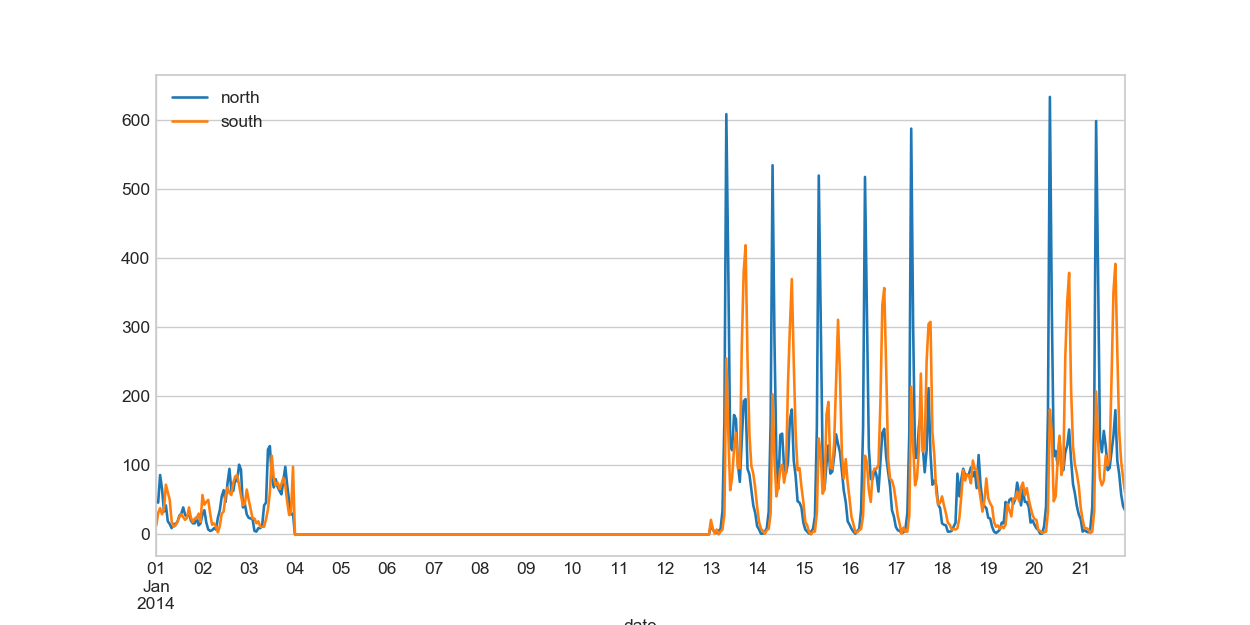

In [90]:
df_january = df_january.resample('H', level=0).sum().sort_values("date",ascending=False)
df_january.plot(figsize=(10, 5))

<IPython.core.display.Javascript object>


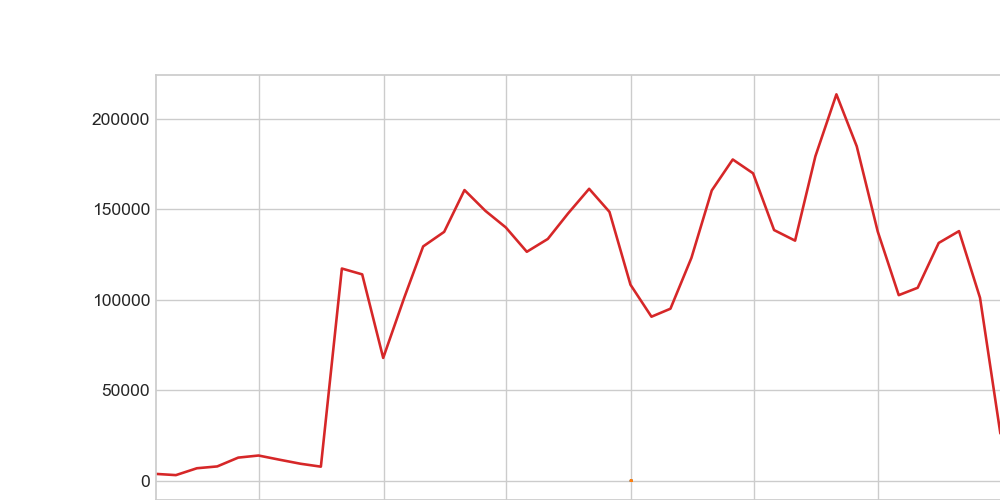

In [85]:
new_year = df.loc[("2013-12-31 12:00:00" < df.index ) & (df.index < "2014-01-01 12:00:00")]
new_year.plot(figsize=(10, 5))#New Year's Eve 2013-2014